### Get the data 

In [35]:
df_hw = pd.read_excel('ratings_movies.xlsx',header=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,5,5,5,1,1,1,1,1,1,5,5,5,2,2,2
1,5,5,5,1,1,1,1,1,1,5,5,5,2,2,2
2,5,5,5,1,1,1,1,1,1,5,5,5,2,2,2
3,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
4,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
5,3,3,3,5,5,5,1,1,1,5,5,5,1,1,1
6,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
7,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
8,1,1,1,3,3,3,5,5,5,5,5,5,1,1,1
9,4,4,4,4,4,4,2,2,2,4,4,4,1,1,1


### Import algorithm 

In [36]:
import os, sys
import json
# cwd= os.getcwd()
# path_to_common_dir = os.path.dirname(os.path.dirname(cwd))
# sys.path.append(path_to_common_dir)

from collaborative_filtering import fit_collaborative_filtering


In [83]:
df_sparse = pd.DataFrame()
for i in range(len(df_hw.columns)):
    df_i = pd.DataFrame(df_hw.iloc[:,i])
    df_i['i'] = df_i.index.values + 15*i
    df_i['fid'] = 15*[i]
    df_i['uid'] = df_i.index.values
    df_i = df_i.rename(columns={i: 'rating'}).set_index('i')
    df_sparse = pd.concat([df_sparse,df_i])
    print(df_i, df_i.columns.values)
df_sparse

    rating  fid  uid
i                   
0        5    0    0
1        5    0    1
2        5    0    2
3        3    0    3
4        3    0    4
5        3    0    5
6        1    0    6
7        1    0    7
8        1    0    8
9        4    0    9
10       4    0   10
11       4    0   11
12       1    0   12
13       1    0   13
14       1    0   14 ['rating' 'fid' 'uid']
    rating  fid  uid
i                   
15       5    1    0
16       5    1    1
17       5    1    2
18       3    1    3
19       3    1    4
20       3    1    5
21       1    1    6
22       1    1    7
23       1    1    8
24       4    1    9
25       4    1   10
26       4    1   11
27       1    1   12
28       1    1   13
29       1    1   14 ['rating' 'fid' 'uid']
    rating  fid  uid
i                   
30       5    2    0
31       5    2    1
32       5    2    2
33       3    2    3
34       3    2    4
35       3    2    5
36       1    2    6
37       1    2    7
38       1    2    8
39       

,rating,fid,uid
i,,,
0,5,0,0
1,5,0,1
2,5,0,2
3,3,0,3
4,3,0,4
...,...,...,...
220,1,14,10
221,1,14,11
222,1,14,12


In [116]:
from sklearn.model_selection import train_test_split 
df_train, df_test= train_test_split (df_sparse, test_size = 0.3)
df_train.shape,df_test.shape

((157, 3), (68, 3))

In [117]:
import numpy as np 
def convert_to_matrix(df, values, index, columns):
    '''
        e.g. values='average_msv', index='phrase', columns='locode' 
    '''
    df_target=df.pivot_table(values=values, index=index, columns=columns, aggfunc=np.max, dropna= False)
    return df_target


df_target = convert_to_matrix(df_train, values='rating', index='uid', columns='fid')
df_target

fid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
uid,,,,,,,,,,,,,,,
0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,NaN,1.0,5.0,5.0,NaN,2.0,2.0,2.0
1,NaN,5.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,5.0,NaN,2.0,NaN,NaN
2,5.0,NaN,5.0,1.0,1.0,1.0,1.0,NaN,1.0,5.0,5.0,5.0,2.0,2.0,2.0
3,3.0,NaN,NaN,NaN,5.0,5.0,NaN,1.0,1.0,5.0,5.0,5.0,1.0,1.0,1.0
4,3.0,3.0,NaN,5.0,5.0,5.0,1.0,1.0,1.0,NaN,5.0,5.0,1.0,1.0,1.0
5,3.0,3.0,NaN,NaN,NaN,5.0,NaN,1.0,1.0,5.0,5.0,5.0,1.0,1.0,NaN
6,1.0,1.0,1.0,NaN,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,NaN,1.0
7,1.0,1.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,1.0
8,1.0,1.0,1.0,3.0,NaN,NaN,5.0,NaN,NaN,5.0,5.0,5.0,1.0,NaN,NaN


### Preparee `Y` and `R` 

In [118]:
Y= df_target.fillna(0) 
R= df_target.applymap(lambda x: 0 if np.isnan(x) else 1)

scale = Y.max() - Y.min()
Y_scaled = Y / scale * 10
Y_scaled

fid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
uid,,,,,,,,,,,,,,,
0,10.0,10.0,10.0,2.0,2.0,2.0,2.0,0.0,2.0,10.0,10.0,0.0,10.0,10.0,10.0
1,0.0,10.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0
2,10.0,0.0,10.0,2.0,2.0,2.0,2.0,0.0,2.0,10.0,10.0,10.0,10.0,10.0,10.0
3,6.0,0.0,0.0,0.0,10.0,10.0,0.0,2.0,2.0,10.0,10.0,10.0,5.0,5.0,5.0
4,6.0,6.0,0.0,10.0,10.0,10.0,2.0,2.0,2.0,0.0,10.0,10.0,5.0,5.0,5.0
5,6.0,6.0,0.0,0.0,0.0,10.0,0.0,2.0,2.0,10.0,10.0,10.0,5.0,5.0,0.0
6,2.0,2.0,2.0,0.0,6.0,6.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,0.0,5.0
7,2.0,2.0,2.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,5.0,5.0
8,2.0,2.0,2.0,6.0,0.0,0.0,10.0,0.0,0.0,10.0,10.0,10.0,5.0,0.0,0.0


### Train model 

In [119]:
X, Theta, J_hist = fit(Y_scaled.values, R.values, num_features=20, alpha=0.0005, lambd=1, max_iter=2000,
                           eps=.01, step=50, verbose=1)

Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.01, max_iter= 2000
50: 916.8516197323445
100: 452.6650615295041
150: 366.6969762480163
200: 329.01675301322655
250: 306.9816250230145
300: 291.99849630334904
350: 280.68335309149427
400: 271.4813813156289
450: 263.61438581211905
500: 256.6644751171447
550: 250.39175532647863
600: 244.6495048364407
650: 239.34255554592676
700: 234.4057780569483
750: 229.79238248186823
800: 225.46725006558947
850: 221.40296819724313
900: 217.57738411549582
950: 213.97204688972408
1000: 210.57118776334687
1050: 207.36103694052866
1100: 204.32935616742256
1150: 201.46511279149485
1200: 198.75824831401485
1250: 196.19951106929773
1300: 193.780333037532
1350: 191.49273741947405
1400: 189.32926790860887
1450: 187.28293344354785
1500: 185.34716413132918
1550: 183.51577532599924
1600: 181.7829377333298
1650: 180.14315202571942
1700: 178.5912268791859
1750: 177.1222596453328
1800: 175.73161908452335
1850: 174.4149297388409
1900: 173.16805763295395
19

### Visualize cost history

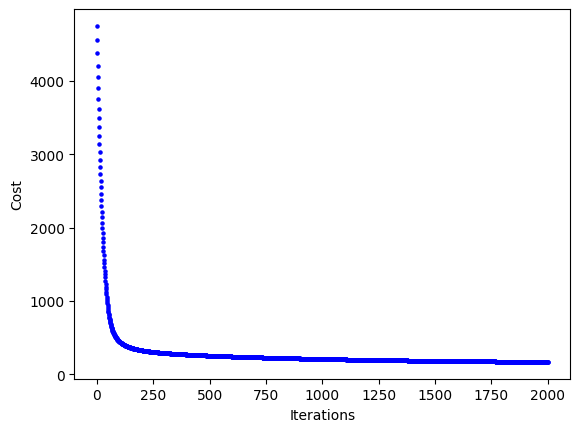

In [120]:
draw_cost_changes(J_hist)

### Predict 

In [121]:
pred = X @ Theta
pred_rescaled = pred * scale.values / 10
pred_rescaled, len(pred_rescaled)

(array([[ 4.86129643,  4.87123106,  4.89772591,  1.08778197,  1.04940431,
          1.06171242,  1.00537795,  1.46257073,  1.04996367,  4.86386362,
          4.98618966,  3.54380495,  1.98049398,  1.93935656,  1.95434186],
        [ 1.88409146,  4.76511085,  1.48032265,  1.05695193,  1.04970447,
          1.04916624,  1.01520593,  0.98128146, -0.36248698,  1.94531727,
          4.84001733,  1.72321729,  1.91444249,  1.05145199,  0.57060138],
        [ 4.90336063,  3.49714339,  4.83978383,  1.08372934,  1.08578802,
          1.13482435,  1.06274267,  0.73035876,  0.99231292,  4.91553623,
          4.91968938,  4.847845  ,  1.95273053,  1.97269068,  1.95525277],
        [ 2.91834272,  1.44821368,  1.94992138,  3.28856954,  4.80337637,
          4.87805762,  1.3296073 ,  1.04414445,  1.04534123,  4.8831903 ,
          4.9531198 ,  4.94319072,  0.99992214,  1.00312211,  1.0074723 ],
        [ 2.99697259,  3.01608528,  3.37333481,  4.78865545,  4.89659683,
          4.90230675,  1.12230362,

### Convert back from pivot to sparse format 

In [122]:
df_results_pivot= pd.DataFrame(pred_rescaled , index= Y.index, columns = Y.columns)
df_results_pivot_temp= pd.DataFrame(df_results_pivot.to_records())
df_results = pd.melt(df_results_pivot_temp, 
            id_vars='uid', 
            value_vars=list(df_results_pivot_temp.columns[1:]), 
            var_name='fid', 
            value_name='rating_pred')
df_results

,uid,fid,rating_pred
0,0,0,4.861296
1,1,0,1.884091
2,2,0,4.903361
3,3,0,2.918343
4,4,0,2.996973
...,...,...,...
220,10,14,0.766449
221,11,14,1.018119
222,12,14,0.908377
223,13,14,0.662142


### Round to existing values 

In [123]:
existing_unique_values = np.array(sorted(df_filmtrust['rating'].unique()))
def round_to_existing(val):
    return existing_unique_values[np.argmin(np.abs(existing_unique_values-val))]

df_results['rating_round']= df_results['rating_pred'].apply(round_to_existing)
df_results

,uid,fid,rating_pred,rating_round
0,0,0,4.861296,4.0
1,1,0,1.884091,2.0
2,2,0,4.903361,4.0
3,3,0,2.918343,3.0
4,4,0,2.996973,3.0
...,...,...,...,...
220,10,14,0.766449,1.0
221,11,14,1.018119,1.0
222,12,14,0.908377,1.0
223,13,14,0.662142,0.5


In [124]:
df_sparse

,rating,fid,uid
i,,,
0,5,0,0
1,5,0,1
2,5,0,2
3,3,0,3
4,3,0,4
...,...,...,...
220,1,14,10
221,1,14,11
222,1,14,12


In [125]:
df_results['fid']= df_results['fid'].astype(int)
df_eval= df_sparse.merge(df_results, on=['fid','uid'])
df_eval

,rating,fid,uid,rating_pred,rating_round
0,5,0,0,4.861296,4.0
1,5,0,1,1.884091,2.0
2,5,0,2,4.903361,4.0
3,3,0,3,2.918343,3.0
4,3,0,4,2.996973,3.0
...,...,...,...,...,...
220,1,14,10,0.766449,1.0
221,1,14,11,1.018119,1.0
222,1,14,12,0.908377,1.0
223,1,14,13,0.662142,0.5


0.7306921214250197
mean error = 0.4017217947778378, max error = 4.06416040720409


<AxesSubplot: >

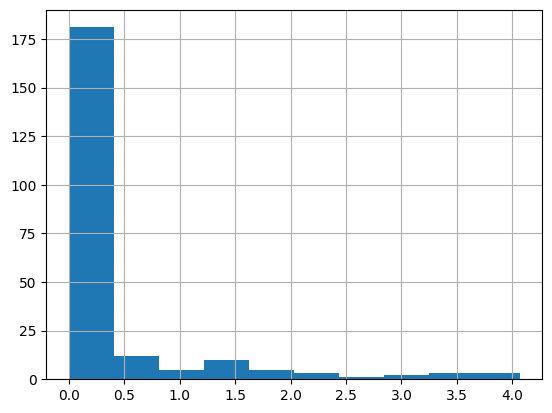

In [126]:
from sklearn.metrics import r2_score
print (r2_score(df_eval['rating'], df_eval['rating_pred']))

df_eval['diff'] = df_eval['rating']- df_eval['rating_pred']
df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()

In [128]:
df_results['fid']= df_results['fid'].astype(int)
df_eval= df_test.merge(df_results, on=['uid','fid'])
df_eval 

,rating,fid,uid,rating_pred,rating_round
0,4,1,10,2.044186,2.0
1,1,12,14,0.054402,0.5
2,1,14,10,0.766449,1.0
3,5,1,2,3.497143,3.5
4,1,11,14,1.668601,1.5
...,...,...,...,...,...
63,1,7,12,1.099761,1.0
64,3,3,6,3.115758,3.0
65,4,0,11,1.880992,2.0
66,4,11,11,3.576327,3.5


0.13374158917365986
mean error = 1.1176470588235294, max error = 4.0


<AxesSubplot: >

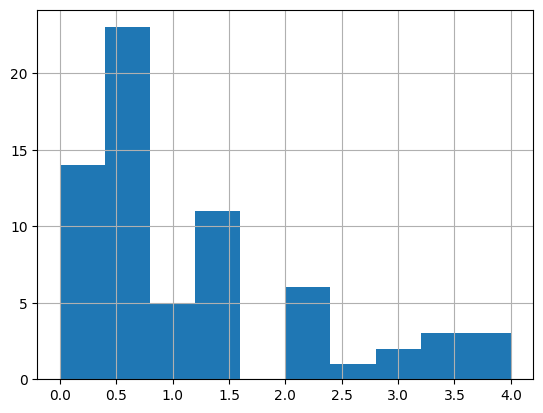

In [129]:
print (r2_score(df_eval['rating'], df_eval['rating_round'])  )
df_eval['diff'] = df_eval['rating']- df_eval['rating_round']
df_eval['diff']= df_eval['diff'].apply(np.abs)
print ('mean error = {}, max error = {}'.format(df_eval['diff'].mean(), df_eval['diff'].max()) )
df_eval['diff'].hist()